In [1]:
import pandas as pd

csv_dir = '/mnt/hgfs/VM_share/liver_project/csv_to_github/'
csv_path = 'Liver_attenuation_AI_vs_manual_ROI_n_615.csv'

df_init = pd.read_csv(csv_dir + csv_path)
df_init = df_init[df_init['partition'] == 'External_test']
# df_init = df_init[df_init['partition'] != 'External_test']
data = df_init
print(data.shape)
data.head()

(535, 8)


,partition,data_set,CT_id,nnunet_to_roi,nnunet_to_3d,nnunet_to_2d,manual_select_roi,manual_hs
0,External_test,covid_china,covid_0700,50.85702,52.90228,51.26072,54.7063,0
1,External_test,covid_china,covid_0701,55.18537,57.69963,56.67069,59.8407,0
2,External_test,covid_china,covid_0702,44.04323,48.89912,46.94244,44.0310,0
3,External_test,covid_china,covid_0703,36.60765,39.93153,39.90219,42.0273,0
4,External_test,covid_china,covid_0704,56.26933,55.38742,55.31121,56.4772,0


In [2]:
dataset_list = list(set(list(data['data_set'])))
print(dataset_list)

['covid_italy', 'RIDER', 'VESSEL12', 'MIDRC-RICORD', 'LUNG1', 'covid_china']


In [3]:
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix
from scipy import stats

for dataset_str in dataset_list:
#     density_col = 
    ai_col = 'nnunet_to_roi'
    df_show = df_init[df_init['data_set']==dataset_str]
    print(dataset_str,'test image numbers: ',df_show.shape[0])
    steatosis_l =  df_show['manual_select_roi'] <40
    steatosis_ai =  df_show[ai_col] <40

    print( dataset_str,'mean',np.mean(df_show[ai_col]),'std',np.std(df_show[ai_col]))
    
    y_true=steatosis_l
    y_pred=steatosis_ai
    
    if dataset_str != 'VESSEL12' :

        auc= roc_auc_score(y_true, y_pred)
        auc = round(auc,3)

        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        sensitivity = tp / (tp + fn) 
        specificity = tn / (tn + fp) 

        print(confusion_matrix(y_true, y_pred), tn, fp, fn, tp)
        print(dataset_str ,'auc',auc, 'sensitivity', sensitivity, 'specificity',specificity, '\n\n\n\n' )

covid_italy test image numbers:  71
covid_italy mean 52.24177788732394 std 11.658353936490771
[[59  1]
 [ 2  9]] 59 1 2 9
covid_italy auc 0.901 sensitivity 0.8181818181818182 specificity 0.9833333333333333 




RIDER test image numbers:  57
RIDER mean 59.79125228070175 std 14.099374371819211
[[55  0]
 [ 0  2]] 55 0 0 2
RIDER auc 1.0 sensitivity 1.0 specificity 1.0 




VESSEL12 test image numbers:  12
VESSEL12 mean 56.65121833333333 std 7.7004979370945374
MIDRC-RICORD test image numbers:  128
MIDRC-RICORD mean 50.865681249999994 std 11.755638694511934
[[105   2]
 [  1  20]] 105 2 1 20
MIDRC-RICORD auc 0.967 sensitivity 0.9523809523809523 specificity 0.9813084112149533 




LUNG1 test image numbers:  238
LUNG1 mean 48.513149831932765 std 9.087030854404485
[[209   3]
 [  3  23]] 209 3 3 23
LUNG1 auc 0.935 sensitivity 0.8846153846153846 specificity 0.9858490566037735 




covid_china test image numbers:  29
covid_china mean 56.428211379310326 std 8.96243063040945
[[26  2]
 [ 0  1]] 26 2 0

In [4]:
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix
from scipy import stats

# for ai_class in range(2):
for ai_class in range(4):

    density_col = ['manual_select_roi','nnunet_to_roi','nnunet_to_3d', 'nnunet_to_2d']
    ai_col = density_col[ai_class]
    df_show = df_init
    print( ai_col ,'test image numbers: ',df_show.shape[0])
    steatosis_l =  df_show['manual_select_roi'] <40
    steatosis_ai =  df_show[ai_col] <40

    print( ai_col ,'mean',np.mean(df_show[ai_col]),'std',np.std(df_show[ai_col]))
    ks_s, ks_p = stats.ks_2samp(df_show['manual_select_roi'], df_show[ai_col])
    if ks_p >0.05:
        print(ai_col, 'ks_p_value',ks_p,' NS NS NS')
    if ks_p <=0.05:
        print(ai_col, 'ks_p_value',ks_p,' Significant')

    y_true=steatosis_l
    y_pred=steatosis_ai

    auc= roc_auc_score(y_true, y_pred)
    auc = round(auc,3)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    sensitivity = tp / (tp + fn) 
    sensitivity = round(sensitivity,3)
    specificity = tn / (tn + fp) 
    specificity = round(specificity,3)

    print(confusion_matrix(y_true, y_pred), tn, fp, fn, tp)
    print( ai_col ,'auc',auc, 'sensitivity', sensitivity, 'specificity',specificity, '\n\n\n\n' )

manual_select_roi test image numbers:  535
manual_select_roi mean 52.32137171962617 std 11.375102411889841
manual_select_roi ks_p_value 1.0  NS NS NS
[[474   0]
 [  0  61]] 474 0 0 61
manual_select_roi auc 1.0 sensitivity 1.0 specificity 1.0 




nnunet_to_roi test image numbers:  535
nnunet_to_roi mean 51.38399480373832 std 11.316329911294533
nnunet_to_roi ks_p_value 0.5037924430548701  NS NS NS
[[466   8]
 [  6  55]] 466 8 6 55
nnunet_to_roi auc 0.942 sensitivity 0.902 specificity 0.983 




nnunet_to_3d test image numbers:  535
nnunet_to_3d mean 50.79636540186916 std 10.219125195896073
nnunet_to_3d ks_p_value 0.012723510345422684  Significant
[[469   5]
 [  7  54]] 469 5 7 54
nnunet_to_3d auc 0.937 sensitivity 0.885 specificity 0.989 




nnunet_to_2d test image numbers:  535
nnunet_to_2d mean 51.1533031588785 std 10.000524524457214
nnunet_to_2d ks_p_value 0.022442678808725133  Significant
[[467   7]
 [  8  53]] 467 7 8 53
nnunet_to_2d auc 0.927 sensitivity 0.869 specificity 0.985 


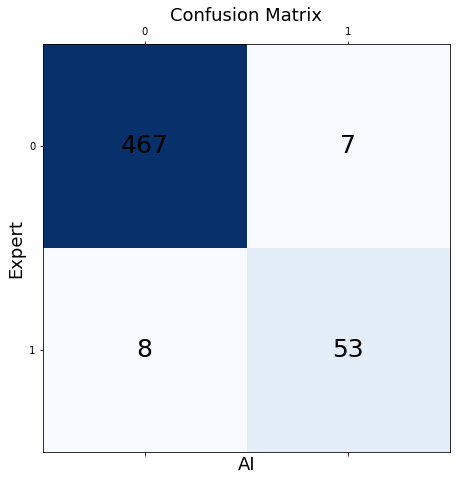

In [5]:
import matplotlib.pyplot as plt
#
conf_matrix = confusion_matrix(y_true, y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', fontsize=25)
 
plt.xlabel('AI', fontsize=18)
plt.ylabel('Expert', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')

plt.show()

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
print("the result of sklearn package")

gt = y_true
pred = y_pred
cm = conf_matrix

TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
sensitivity1 =  TP / (TP + FN)
print('sensitivity : ', sensitivity1)
specificity1 = TN / (TN + FP)
print('specificity: ',specificity1)

concordance_rate = (cm[0][0] + cm[1][1]) / len(y_pred)

print("concordance_rate:",concordance_rate)

sklearn_auc = roc_auc_score(gt,pred)

print("sklearn auc:",sklearn_auc)
accuracy = accuracy_score(gt,pred)
print("sklearn accuracy:",accuracy)
recal = recall_score(gt,pred)
precision = precision_score(gt,pred)
print("sklearn recall:{},precision:{}".format(recal,precision))
print("sklearn F1-score:{}".format((2*recal*precision)/(recal+precision)))

sklearn_specificity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('specificity : ', sklearn_specificity1 )

sklearn_sensitivity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('sensitivity : ', sklearn_sensitivity1)

accuracy1=(cm[0,0]+cm[1,1])/sum(sum(cm))
print ('Accuracy : ', accuracy1)

the result of sklearn package
sensitivity :  0.8688524590163934
specificity:  0.9852320675105485
concordance_rate: 0.9719626168224299
sklearn auc: 0.9270422632634708
sklearn accuracy: 0.9719626168224299
sklearn recall:0.8688524590163934,precision:0.8833333333333333
sklearn F1-score:0.8760330578512396
specificity :  0.9852320675105485
sensitivity :  0.8688524590163934
Accuracy :  0.9719626168224299


In [7]:
from sklearn.metrics import roc_auc_score
import stat_util # stat_util.py is stored besides this jupyter script
score, ci_lower, ci_upper, scores = stat_util.score_ci(
    y_true, y_pred, score_fun=roc_auc_score,  n_bootstraps=1000)
print(score, ci_lower, ci_upper)

0.9270422632634708 0.8817525773195877 0.9659073963614674


In [8]:
n_bootstraps = 1000
y_true = np.array(y_true)
y_preds = np.atleast_2d(y_pred)
assert all(len(y_true) == len(y) for y in y_preds)
np.random.seed(0)

scores_auc = []
scores_sense = []
scores_spec = [] 

for i in range(n_bootstraps):
    readers = np.random.randint(0, len(y_preds), len(y_preds))
    indices = np.random.randint(0, len(y_true), len(y_true))  
#     print(' len of class',  len(np.unique(y_true[indices])))
    if  len(np.unique(y_true[indices])) < 2:
            continue
    reader_scores_auc,  reader_scores_sense ,reader_scores_spec = [],[], []
#     print(readers)
    for r in readers:
        reader_scores_auc.append(roc_auc_score(y_true[indices], y_preds[r][indices]))
        
        TN, FP, FN, TP = confusion_matrix(y_true[indices],y_preds[r][indices]).ravel()
        reader_scores_sense.append( TP / (TP + FN))
        reader_scores_spec.append( TN / (TN + FP))
        
    scores_auc.append(np.mean(reader_scores_auc))
    scores_sense.append(np.mean(reader_scores_sense))
    scores_spec.append(np.mean(reader_scores_spec))

sorted_auc = np.array(sorted(scores_auc))
sorted_sense = np.array(sorted(scores_sense))
sorted_spec = np.array(sorted(scores_spec))

print(len(sorted_auc))
alpha = (1.0 - 0.95) / 2.0
ci_lower_auc = sorted_auc[int(round(alpha * len(sorted_auc)))]
ci_upper_auc = sorted_auc[int(round((1.0 - alpha) * len(sorted_auc)))]

ci_lower_sense = sorted_sense[int(round(alpha * len(sorted_sense)))]
ci_upper_sense = sorted_sense[int(round((1.0 - alpha) * len(sorted_sense)))]

ci_lower_spec = sorted_spec[int(round(alpha * len(sorted_spec)))]
ci_upper_spec = sorted_spec[int(round((1.0 - alpha) * len(sorted_spec)))]


1000


In [9]:
print(ai_col ,'auc : ', round(sklearn_auc,3) )
print( '95% ci',round(ci_lower_auc,3) ,  round(ci_upper_auc,3),'\n')

print(ai_col ,'sensitivity : ', round(sklearn_sensitivity1,3))
print( '95% ci',round(ci_lower_sense,3) ,  round(ci_upper_sense,3),'\n')

print(ai_col ,'specificity : ', round(sklearn_specificity1,3) )
print( '95% ci',round(ci_lower_spec,3) ,  round(ci_upper_spec,3),'\n')

nnunet_to_2d auc :  0.927
95% ci 0.879 0.964 

nnunet_to_2d sensitivity :  0.869
95% ci 0.772 0.944 

nnunet_to_2d specificity :  0.985
95% ci 0.974 0.996 

